# Explore GeMAPS
Use this code to find out how the features of the GeMAPS feature set are extracted

Most of the logic for this Notebook is hidden in the class "Custom_GeMAPS"

In [1]:
# Imports
# Python packages
import numpy as np
import matplotlib.pyplot as plt

# Custom package
import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parent / "src"))
from age_by_voice.audio.custom_gemaps import Custom_GeMAPS, GeMAPS_Settings

# Load an audiofile
Load an audiofile into the Custom_GeMAPS class.
Its best to use a Wave file.
You can customize the samplerate.

When the file is found the class has the sample_rate (sr) and the array of samples (y).

In [2]:
audio_path: str = "/home/chr1s/Dokumente/github/Programming/Python/Age_by_Voice/data/awed5130.wav"

# play the audio
import IPython.display as ipd
ipd.Audio(audio_path, autoplay=True)

In [3]:
custom_ge = Custom_GeMAPS(audio_path=audio_path)

custom_ge.sr

16000

Text(0, 0.5, 'Amplitude')

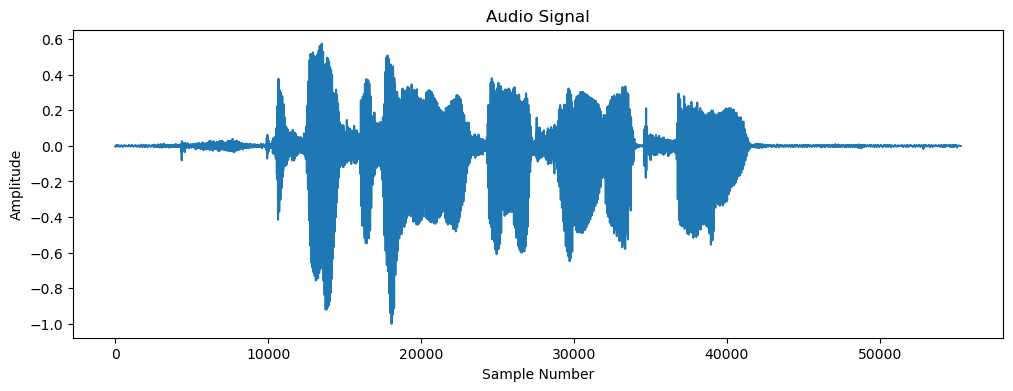

In [4]:
# Plot the samples
plt.figure(figsize=(12, 4))
plt.plot(custom_ge.y)

plt.title("Audio Signal")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Amplitude')

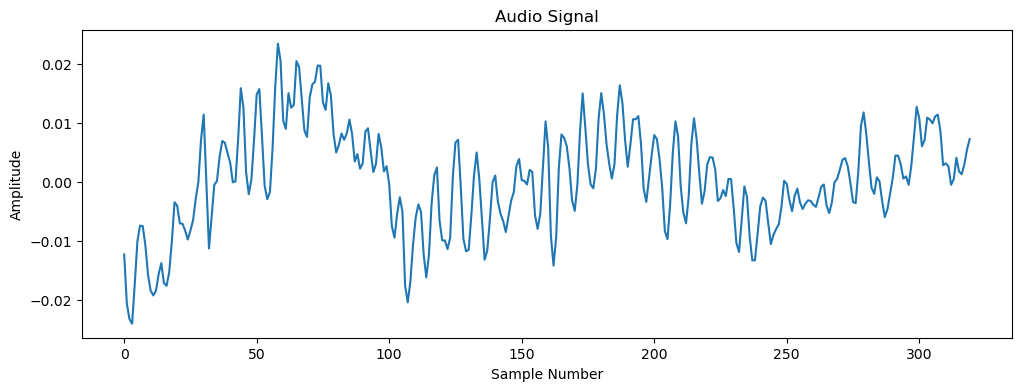

In [5]:
# Plot a short timeframe of the audio signal 
plt.figure(figsize=(12, 4))
length = 0.02 # lenghth of the timeframe in seconds
offset = 0.5 # offset in seconds
time_start = int(custom_ge.sr * offset)
time_end = time_start + int(custom_ge.sr * length)
plt.plot(custom_ge.y[time_start:time_end])

plt.title("Audio Signal")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")

# Into the Frequency domain!
Visualize the audio file in the frequency domain using the spectrogram function of the Custom_GeMAPS class.

Text(0, 0.5, 'Magnitude (dB)')

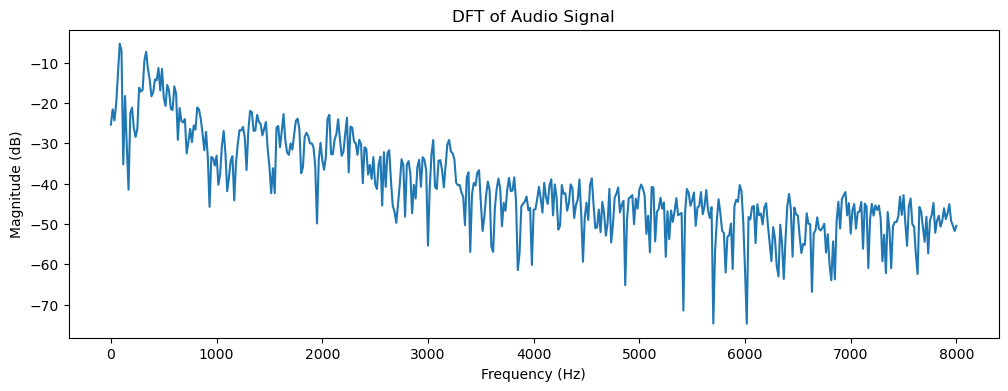

In [6]:
# The DFT
offset = 0.2 # offset in seconds

dft = custom_ge.dft(ts=offset, log_values=True)


plt.figure(figsize=(12, 4))
plt.plot(dft[:, 0], dft[:, 1])
plt.title("DFT of Audio Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")

Text(0, 0.5, 'Frequency (Hz)')

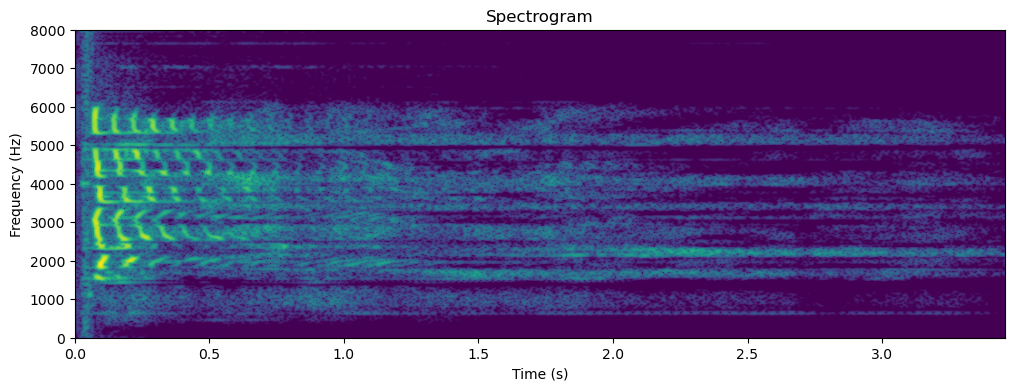

In [7]:
# The Spectrogram

spectrogram = custom_ge.spectrogram(log_values=True)

plt.figure(figsize=(12, 4))
plt.imshow(
    spectrogram.T,
    aspect="auto",
    origin="lower",
    extent=[0, custom_ge.y.shape[0] / custom_ge.sr, 0, custom_ge.sr / 2],
)
plt.title("Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

Mean F0: 206.63 Hz, STD: 131.87 Hz


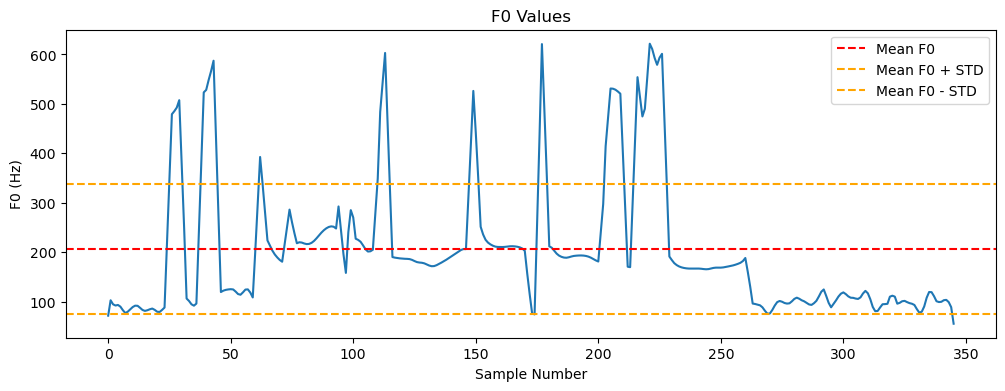

In [8]:
# Get F0
f0_dict = custom_ge.f0()
f0_values = f0_dict["smoothed_f0_values"]
f0_mean = f0_dict["mean"]
f0_std = f0_dict["std"]

# print the f0 stats
print(f"Mean F0: {f0_mean:.2f} Hz, STD: {f0_std:.2f} Hz")

# Plot smoothed f0 values
plt.figure(figsize=(12, 4))
plt.plot(f0_values)
plt.title("F0 Values")
plt.xlabel("Sample Number")
plt.ylabel("F0 (Hz)")
plt.axhline(f0_mean, color="red", linestyle="--", label="Mean F0")
plt.axhline(f0_mean + f0_std, color="orange", linestyle="--", label="Mean F0 + STD")
plt.axhline(f0_mean - f0_std, color="orange", linestyle="--", label="Mean F0 - STD")
plt.legend()
plt.show()

In [9]:
# Jitter
jitter_dict = custom_ge.jitter()
jitter_local = jitter_dict["jitter_local"]
jitter_local_absolute = jitter_dict["jitter_local_absolute"]
jitter_rap = jitter_dict["jitter_rap"]

# print the jitter stats
print(f"Jitter Local: {jitter_local:.2f}, Jitter Local Absolute: {jitter_local_absolute:.2f}, Jitter RAP: {jitter_rap:.2f}")

Jitter Local: 0.02, Jitter Local Absolute: 0.00, Jitter RAP: 0.01


In [ ]:
del custom_ge